In [1]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
#common.run(args="--help")
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [18]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1
159705 Edges loaded

Benchmark results:
Initialize	µ=1.26787s	sigma=0s	median=1.26787s	total=1.26787	num_calls=1
Kruskal()	µ=0.00505154s	sigma=0s	median=0.00505154s	total=0.00505154	num_calls=1
filter()	µ=0.000811803s	sigma=0.000306963s	median=0.000672534s	total=0.00730623	num_calls=9
grow MST	µ=0.000400363s	sigma=0s	median=0.000400363s	total=0.000400363	num_calls=1
partition()	µ=0.000782826s	sigma=0.000154989s	median=0.000689746s	total=0.00704544	num_calls=9
sort()	µ=0.00461608s	sigma=0s	median=0.00461608s	total=0.00461608	num_calls=1
total	µ=1.28732s	sigma=0s	median=1.28732s	total=1.28732	num_calls=1


,tag,average,std_dev,median,total,num_calls
0,Initialize,1.267870,0.000000,1.267870,1.267870,1
1,Kruskal(),0.005052,0.000000,0.005052,0.005052,1
2,filter(),0.000812,0.000307,0.000673,0.007306,9
3,grow MST,0.000400,0.000000,0.000400,0.000400,1
4,partition(),0.000783,0.000155,0.000690,0.007045,9
5,sort(),0.004616,0.000000,0.004616,0.004616,1
6,total,1.287320,0.000000,1.287320,1.287320,1


In [19]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 5"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 5
159705 Edges loaded

Benchmark results:
Initialize	µ=0.0343888s	sigma=0.0291308s	median=0.0017706s	total=0.171944	num_calls=5
Kruskal()	µ=0.00224508s	sigma=0.000646204s	median=0.00364999s	total=0.0202057	num_calls=9
filter()	µ=0.00135092s	sigma=0.000334828s	median=9.9336e-05s	total=0.0378257	num_calls=28
grow MST	µ=0.000178406s	sigma=5.10487e-05s	median=0.00031936s	total=0.00160566	num_calls=9
partition()	µ=0.000939124s	sigma=0.000106282s	median=0.000460226s	total=0.0262955	num_calls=28
sort()	µ=0.00203906s	sigma=0.000595659s	median=0.00329965s	total=0.0183515	num_calls=9
total	µ=0.0512847s	sigma=0.030316s	median=0.0162103s	total=0.256424	num_calls=5


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.034389,0.029131,0.001771,0.171944,5
1,Kruskal(),0.002245,0.000646,0.003650,0.020206,9
2,filter(),0.001351,0.000335,0.000099,0.037826,28
3,grow MST,0.000178,0.000051,0.000319,0.001606,9
4,partition(),0.000939,0.000106,0.000460,0.026295,28
5,sort(),0.002039,0.000596,0.003300,0.018351,9
6,total,0.051285,0.030316,0.016210,0.256424,5


In [20]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 10
159705 Edges loaded

Benchmark results:
Initialize	µ=0.0180341s	sigma=0.0153976s	median=0.00177276s	total=0.180341	num_calls=10
Kruskal()	µ=0.00286794s	sigma=0.000540314s	median=0.000562788s	total=0.045887	num_calls=16
filter()	µ=0.00131927s	sigma=0.000214542s	median=0.000231685s	total=0.0738793	num_calls=56
grow MST	µ=0.000202602s	sigma=3.72415e-05s	median=2.0448e-05s	total=0.00324163	num_calls=16
partition()	µ=0.000876486s	sigma=7.13041e-05s	median=0.00162476s	total=0.0490832	num_calls=56
sort()	µ=0.00263485s	sigma=0.000504232s	median=0.00051637s	total=0.0421576	num_calls=16
total	µ=0.0349485s	sigma=0.0160409s	median=0.0191484s	total=0.349485	num_calls=10


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.018034,0.015398,0.001773,0.180341,10
1,Kruskal(),0.002868,0.000540,0.000563,0.045887,16
2,filter(),0.001319,0.000215,0.000232,0.073879,56
3,grow MST,0.000203,0.000037,0.000020,0.003242,16
4,partition(),0.000876,0.000071,0.001625,0.049083,56
5,sort(),0.002635,0.000504,0.000516,0.042158,16
6,total,0.034949,0.016041,0.019148,0.349485,10


In [10]:
# this will fail after 1.5 mins => let the largest graph only run 3 times
args = f"--inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 10"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_12800_50pct.csv --mst-kernel 1 -s 1 -n 10
40966875 Edges loaded
terminate called after throwing an instance of 'std::bad_array_new_length'
  what():  std::bad_array_new_length


CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv', '--inputfile', 'benchmark_data/barabasi_12800_50pct.csv', '--mst-kernel', '1', '-s', '1', '-n', '10']' died with <Signals.SIGABRT: 6>.

In [18]:
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [25]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]

def get_run_list(n_nodes_list, density, prefix, flags, reps_standard=10, reps_last=3):
    run_list = []
    for n_nodes in n_nodes_list[:-1]:
        run_list.append({'n_nodes': n_nodes, 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_standard}'})
    # fewer repetitions on the biggest graph
    run_list.append({'n_nodes': n_nodes_list[-1], 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_last}'})
    return run_list



thrust_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'thrust', '-s 2 -p 3 -f 2')
thrust_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'thrust', '-s 2 -p 3 -f 2')
thrust_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'thrust', '-s 2 -p 3 -f 2')

filter_kruskal_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filter_kruskal', '')
filter_kruskal_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filter_kruskal', '')
filter_kruskal_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filter_kruskal', '')

regular_kruskal_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filter_kruskal', '-m 0')
regular_kruskal_runs_d50 = get_run_list(n_nodes_list_d10, '10pct', 'filter_kruskal', '-m 0')
regular_kruskal_runs_d90 = get_run_list(n_nodes_list_d10, '10pct', 'filter_kruskal', '-m 0')


"""
# filter kruskal (all flags default)
# ----------------------------------
filter_kruskal_runs_d10 = []
for n_nodes in n_nodes_list_d10[:-1]:
    filter_kruskal_runs_d10.append({'n_nodes': n_nodes, 'density': '10pct', 'prefix':'filter_kruskal', 'flags':'-n 10'})
# only 3 repetitions on the biggest graph
filter_kruskal_runs_d10.append({'n_nodes': n_nodes_list_d10[-1], 'density': '10pct', 'prefix':'filter_kruskal', 'flags':'-n 3'})

regular_kruskal_runs_d10 = []
for n_nodes in n_nodes_list_d10[:-1]:
    regular_kruskal_runs_d10.append({'n_nodes': n_nodes, 'density': '10pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 10'})
# only 3 repetitions on the biggest graph
regular_kruskal_runs_d10.append({'n_nodes': n_nodes_list_d10[-1], 'density': '10pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 3'})

thrust_runs_d10 = []
for n_nodes in n_nodes_list_d10[:-1]:
    thrust_runs_d10.append({'n_nodes': n_nodes, 'density': '10pct', 'prefix':'thrust', 'flags':'-s 2 -p 3 -f 2 -n 10'})
# only 3 repetitions on the biggest graph
thrust_runs_d10.append({'n_nodes': n_nodes_list_d10[-1], 'density': '10pct', 'prefix':'thrust', 'flags':'-s 2 -p 3 -f 2 -n 3'})



filter_kruskal_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    filter_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'filter_kruskal', 'flags':'-n 10'})
# only 3 repetitions on the biggest graph
filter_kruskal_runs_d50.append({'n_nodes': n_nodes_list_d50[-1], 'density': '50pct', 'prefix':'filter_kruskal', 'flags':'-n 3'})

regular_kruskal_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    regular_kruskal_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 10'})
# only 3 repetitions on the biggest graph
regular_kruskal_runs_d50.append({'n_nodes': n_nodes_list_d50[-1], 'density': '50pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 3'})

thrust_runs_d50 = []
for n_nodes in n_nodes_list_d50[:-1]:
    thrust_runs_d50.append({'n_nodes': n_nodes, 'density': '50pct', 'prefix':'thrust', 'flags':'-s 2 -p 3 -f 2 -n 10'})
# only 3 repetitions on the biggest graph
thrust_runs_d50.append({'n_nodes': n_nodes_list_d50[-1], 'density': '50pct', 'prefix':'thrust', 'flags':'-s 2 -p 3 -f 2 -n 3'})



filter_kruskal_runs_d90 = []
for n_nodes in n_nodes_list_d90[:-1]:
    filter_kruskal_runs_d90.append({'n_nodes': n_nodes, 'density': '90pct', 'prefix':'filter_kruskal', 'flags':'-n 10'})
# only 3 repetitions on the biggest graph
filter_kruskal_runs_d90.append({'n_nodes': n_nodes_list_d90[-1], 'density': '90pct', 'prefix':'filter_kruskal', 'flags':'-n 3'})

regular_kruskal_runs_d90 = []
for n_nodes in n_nodes_list_d90[:-1]:
    regular_kruskal_runs_d90.append({'n_nodes': n_nodes, 'density': '90pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 10'})
# only 3 repetitions on the biggest graph
regular_kruskal_runs_d90.append({'n_nodes': n_nodes_list_d90[-1], 'density': '90pct', 'prefix':'regular_kruskal', 'flags':'-m 0 -n 3'})

thrust_runs_d90 = []
for n_nodes in n_nodes_list_d90[:-1]:
    thrust_runs_d90.append({'n_nodes': n_nodes, 'density': '90pct', 'prefix':'thrust', 'flags':'-s 2 -p 3 -f 2 -n 10'})
# only 3 repetitions on the biggest graph
thrust_runs_d90.append({'n_nodes': n_nodes_list_d90[-1], 'density': '90pct', 'prefix':'thrust', 'flags':'-s 2 -p 3 -f 2 -n 3'})

thrust_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'thrust', '-s 2 -p 3 -f 2')

"""

In [27]:
for i in range(len(thrust_runs_d90)):
    if thrust_runs_d90[i] == thrust_runs_d90_alt[i]:
        print("its good")
    else:
        print('error')

print('')
for r in thrust_runs_d90_alt:
    print(r)


its good
its good
its good
its good
its good
its good
its good
its good
its good

{'n_nodes': 25, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 50, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 100, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 200, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 400, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 800, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 1600, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 3200, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 10'}
{'n_nodes': 6400, 'density': '90pct', 'prefix': 'thrust', 'flags': '-s 2 -p 3 -f 2 -n 3'}


In [7]:
do_benchmark_runs(filter_kruskal_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv -n 10
Running benchmark with ./hom

In [8]:
do_benchmark_runs(filter_kruskal_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -n 10
Running benchmark with ./home/

In [9]:
do_benchmark_runs(filter_kruskal_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/filter_kruskal_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -n 10
Running benchmark with ./home/st

In [10]:
do_benchmark_runs(regular_kruskal_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv -m 0 -n 10
Runn

In [11]:
do_benchmark_runs(regular_kruskal_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -m 0 -n 10
Runnin

In [12]:
do_benchmark_runs(regular_kruskal_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -m 0 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/regular_kruskal_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -m 0 -n 10
Running 

In [13]:
do_benchmark_runs(thrust_runs_d10)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_100_10pct.csv --inputfile benchmark_data/barabasi_100_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_200_10pct.csv --inputfile benchmark_data/barabasi_200_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_400_10pct.csv --inputfile benchmark_data/barabasi_400_10pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_800_10pct.csv --inputfile benchmark_data/barabasi_800_10pct.csv -s 2 -p 3 -f 2 -n 10


In [14]:
do_benchmark_runs(thrust_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_400_50pct.csv --inputfile benchmark_data/barabasi_400_50pct.csv -s 2 -p 3 -f 2 -n 10
Ru

In [15]:
do_benchmark_runs(thrust_runs_d90)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_25_90pct.csv --inputfile benchmark_data/barabasi_25_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_50_90pct.csv --inputfile benchmark_data/barabasi_50_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_100_90pct.csv --inputfile benchmark_data/barabasi_100_90pct.csv -s 2 -p 3 -f 2 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/thrust_200_90pct.csv --inputfile benchmark_data/barabasi_200_90pct.csv -s 2 -p 3 -f 2 -n 10
Runn

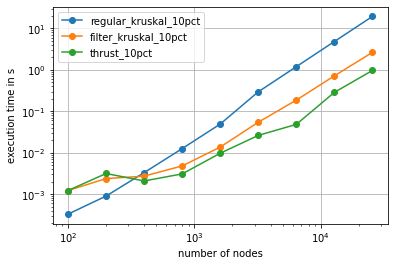

In [29]:
plot_lines(regular_kruskal_runs_d10 + filter_kruskal_runs_d10 + thrust_runs_d10)
plt.savefig(common.OUT_DIR / "lines1.png", dpi=200)


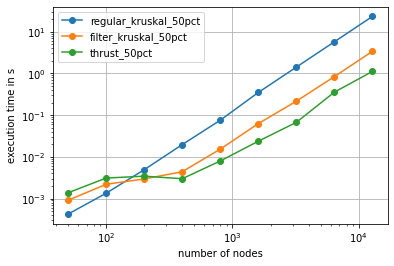

In [30]:
plot_lines(regular_kruskal_runs_d50 + filter_kruskal_runs_d50 + thrust_runs_d50)
plt.savefig(common.OUT_DIR / "lines1.png", dpi=200)


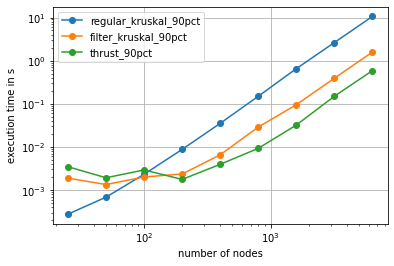

In [31]:
plot_lines(regular_kruskal_runs_d90 + filter_kruskal_runs_d90 + thrust_runs_d90)
plt.savefig(common.OUT_DIR / "lines1.png", dpi=200)

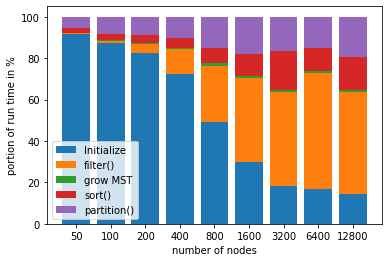

In [32]:
stacked_bars(filter_kruskal_runs_d50)
plt.savefig(common.OUT_DIR / "bars_filter_kruskal_d50.png", dpi=200)


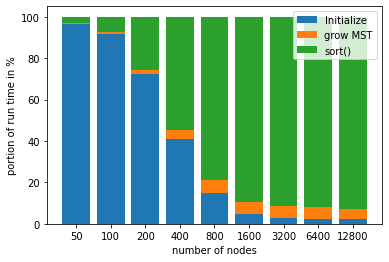

In [33]:
stacked_bars(regular_kruskal_runs_d50, regular_kruskal=True)
plt.savefig(common.OUT_DIR / "bars_regular_kruskal_d50.png", dpi=200)


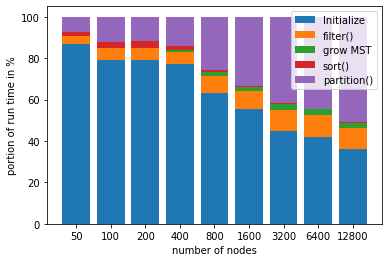

In [34]:
stacked_bars(thrust_runs_d50)
plt.savefig(common.OUT_DIR / "bars_thrust_d50.png", dpi=200)


[50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]


dict_keys(['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()'])

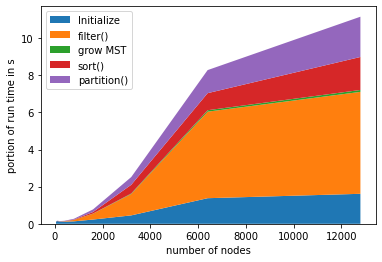

In [35]:

labels, stack = collect_for_stack(filter_kruskal_runs_d50)
print(labels)
stack
plt.stackplot(labels,stack['Initialize'],stack['filter()'], stack['grow MST'], stack['sort()'], stack['partition()'], labels=stack.keys())
plt.legend(loc='upper left')
plt.xlabel('number of nodes')
plt.ylabel('portion of run time in s')
stack.keys()